In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.feature_selection import SelectKBest
from scipy.stats import norm

In [2]:
data = pd.read_csv("bankruptcy.csv")

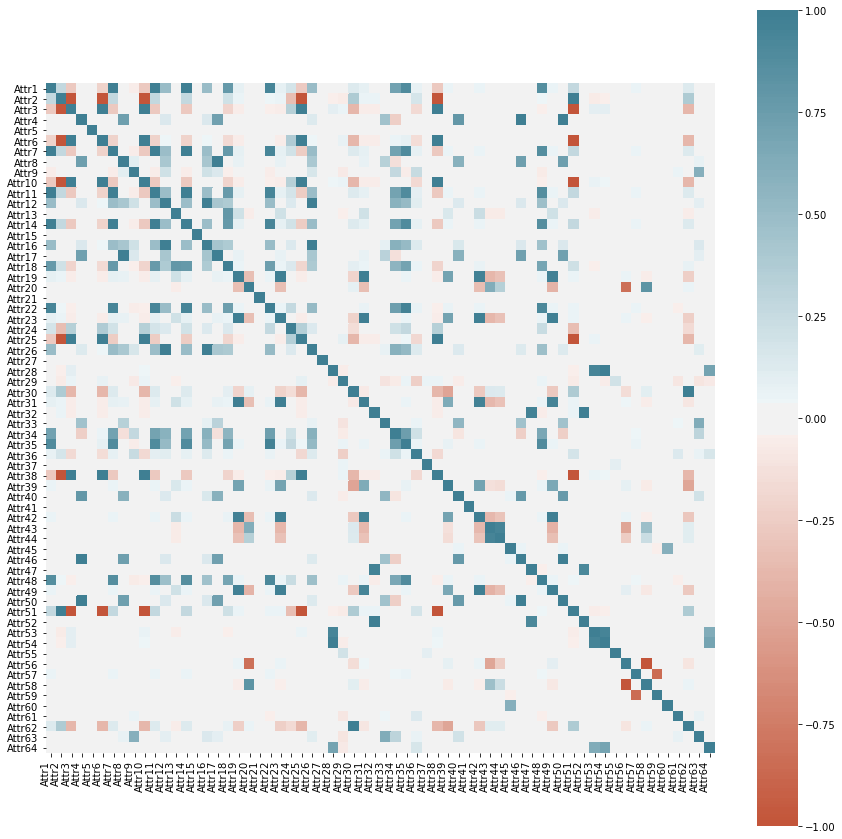

In [3]:
fig, ax = plt.subplots(figsize=(15, 15))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [4]:
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [5]:
data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,1.050300e+04,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,6.638549e+03,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,...,5.989196e+04,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,...,1.462100e+01,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+00,0.000000,0.050945,1.111000,1.199000,0.515500,...,8.822900e+02,0.051765,0.106880,0.953060,0.002976,9.952100e+00,6.677300,7.066400e+01,5.139200,4.059300
75%,0.123805,0.689330,0.419545,2.959500,5.608400e+01,0.072584,0.142275,2.857100,2.059100,0.725635,...,4.348900e+03,0.130010,0.271310,0.995927,0.240320,2.093600e+01,10.587500,1.182200e+02,8.882600,9.682750
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,3.380500e+06,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000


In [6]:
data["class"].unique()

array(["b'0'", "b'1'"], dtype=object)

In [7]:
datanew = data.replace(["b'0'", "b'1'"], [0,1])

In [8]:
datanew["class"].unique()

array([0, 1], dtype=int64)

In [9]:
datanew.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0


In [10]:
datanew.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000,10503.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800,0.047129
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,...,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315,0.211926
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102,0.000000
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,...,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350,0.000000
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+00,0.000000,0.050945,1.111000,1.199000,0.515500,...,0.051765,0.106880,0.953060,0.002976,9.952100e+00,6.677300,7.066400e+01,5.139200,4.059300,0.000000
75%,0.123805,0.689330,0.419545,2.959500,5.608400e+01,0.072584,0.142275,2.857100,2.059100,0.725635,...,0.130010,0.271310,0.995927,0.240320,2.093600e+01,10.587500,1.182200e+02,8.882600,9.682750,0.000000
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000,1.000000


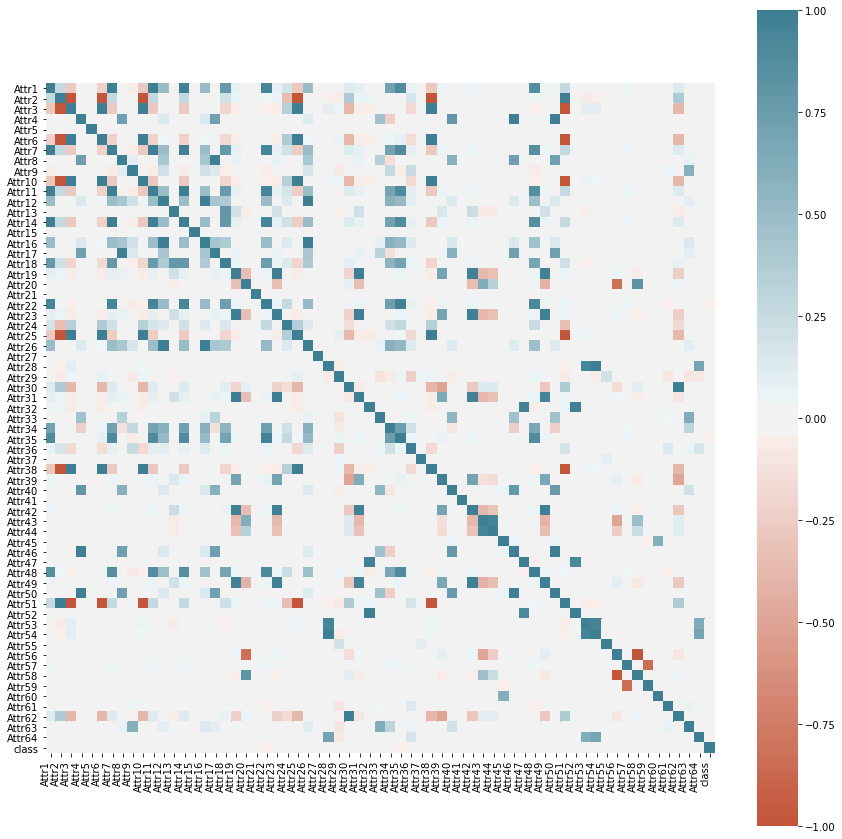

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
corr = datanew.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [12]:
datanew = datanew.replace('', np.nan)

In [13]:
np.where(pd.isnull(datanew))

(array([    1,     1,     2, ..., 10500, 10501, 10501], dtype=int64),
 array([23, 36, 36, ..., 20, 26, 36], dtype=int64))

In [14]:
missingValues = datanew.columns[datanew.isna().any()].tolist()

In [15]:
missingValues

['Attr4',
 'Attr5',
 'Attr8',
 'Attr9',
 'Attr12',
 'Attr13',
 'Attr15',
 'Attr16',
 'Attr17',
 'Attr19',
 'Attr20',
 'Attr21',
 'Attr23',
 'Attr24',
 'Attr26',
 'Attr27',
 'Attr28',
 'Attr30',
 'Attr31',
 'Attr32',
 'Attr33',
 'Attr34',
 'Attr37',
 'Attr39',
 'Attr40',
 'Attr41',
 'Attr42',
 'Attr43',
 'Attr44',
 'Attr45',
 'Attr46',
 'Attr47',
 'Attr49',
 'Attr50',
 'Attr52',
 'Attr53',
 'Attr54',
 'Attr56',
 'Attr58',
 'Attr60',
 'Attr61',
 'Attr62',
 'Attr63',
 'Attr64']

In [16]:
missing_values_total = pd.DataFrame(datanew, columns=missingValues).isnull().sum()
missing_values_total

Attr4       18
Attr5       25
Attr8       14
Attr9        3
Attr12      18
Attr13      43
Attr15       8
Attr16      14
Attr17      14
Attr19      43
Attr20      43
Attr21     807
Attr23      43
Attr24     227
Attr26      14
Attr27     715
Attr28     228
Attr30      43
Attr31      43
Attr32     101
Attr33      18
Attr34      14
Attr37    4736
Attr39      43
Attr40      18
Attr41     202
Attr42      43
Attr43      43
Attr44      43
Attr45     591
Attr46      18
Attr47      86
Attr49      43
Attr50      14
Attr52      86
Attr53     228
Attr54     228
Attr56      43
Attr58      29
Attr60     592
Attr61      17
Attr62      43
Attr63      18
Attr64     228
dtype: int64

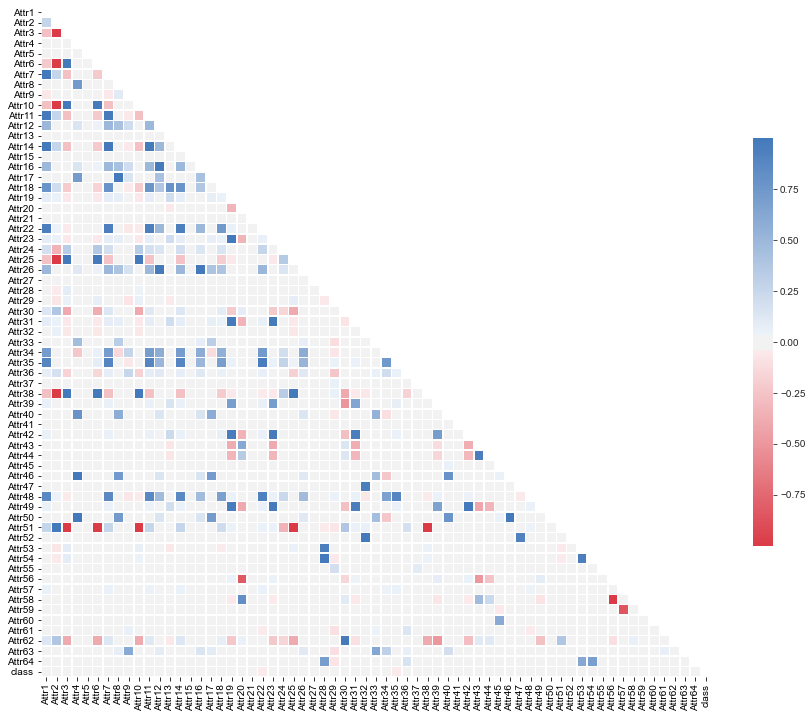

In [17]:
# visualise the data with seaborn
corr = datanew.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig1, ax1 = plt.subplots(figsize=(15, 15))
sns.set_style(style = 'white')
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax1)

In [18]:
skewnes_arr = datanew.skew(axis = 0, skipna = True).tolist()
skewnes_arr

[51.97174974308469,
 71.5960191688245,
 -71.69157647082204,
 101.30578604983302,
 -96.85758241817233,
 -69.36731120643582,
 51.12249330955287,
 57.59069057312554,
 89.23915209296678,
 -71.53233877920708,
 50.325598665638466,
 63.800650707101546,
 95.39993809123416,
 51.1226082140132,
 78.01677587973413,
 66.17821155113639,
 56.8634538399701,
 49.39102671913182,
 -55.990399154610294,
 72.00940147254721,
 96.51744012268118,
 49.43607129465783,
 -56.75341633237253,
 58.74031498663766,
 -70.65884267125828,
 68.0841526154139,
 58.57875077980928,
 40.2811924291074,
 -0.030266223261154124,
 -58.69119532531004,
 -56.90589802445403,
 91.09697258856316,
 49.971409621260506,
 75.07516596311982,
 52.68841277259564,
 31.606762507332572,
 50.65384594349312,
 -71.68493881475145,
 -52.58287378129465,
 53.74957520781766,
 101.48319857882184,
 -57.8411896641871,
 61.55641862619522,
 78.2913048998831,
 39.39154083453926,
 101.38405615070256,
 74.48581419703461,
 38.21777094168027,
 -60.7533514340502,
 10

In [19]:
corr_pairs = corr.unstack()
pd.set_option("max_rows", None)
print(corr_pairs)

Attr1   Attr1     1.000000
        Attr2     0.268892
        Attr3    -0.271895
        Attr4     0.001285
        Attr5    -0.001064
        Attr6    -0.218187
        Attr7     0.998670
        Attr8     0.001902
        Attr9    -0.055770
        Attr10   -0.268475
        Attr11    0.989035
        Attr12    0.501859
        Attr13    0.015829
        Attr14    0.998669
        Attr15    0.000241
        Attr16    0.500012
        Attr17    0.002564
        Attr18    0.777686
        Attr19    0.081126
        Attr20   -0.007920
        Attr21   -0.004088
        Attr22    0.942101
        Attr23    0.081067
        Attr24    0.185296
        Attr25   -0.258979
        Attr26    0.506218
        Attr27    0.019734
        Attr28    0.020467
        Attr29    0.023342
        Attr30    0.127359
        Attr31    0.082106
        Attr32    0.020267
        Attr33   -0.004045
        Attr34    0.717586
        Attr35    0.892008
        Attr36    0.077158
        Attr37    0.005553
 

In [33]:
high_corr = corr_pairs[corr_pairs>=0.8]
pd.set_option("max_rows", 200)
print(high_corr)

Attr1   Attr1     1.000000
        Attr7     0.998670
        Attr11    0.989035
        Attr14    0.998669
        Attr22    0.942101
        Attr35    0.892008
        Attr48    0.870676
Attr2   Attr2     1.000000
        Attr51    0.998658
Attr3   Attr3     1.000000
        Attr6     0.984754
        Attr10    0.997925
        Attr25    0.994051
        Attr38    0.998415
Attr4   Attr4     1.000000
        Attr46    0.999933
        Attr50    0.998707
Attr5   Attr5     1.000000
Attr6   Attr3     0.984754
        Attr6     1.000000
        Attr10    0.985998
        Attr25    0.988859
        Attr38    0.985479
Attr7   Attr1     0.998670
        Attr7     1.000000
        Attr11    0.990676
        Attr14    0.999999
        Attr22    0.944666
        Attr35    0.894196
        Attr48    0.873943
Attr8   Attr8     1.000000
        Attr17    0.999169
Attr9   Attr9     1.000000
Attr10  Attr3     0.997925
        Attr6     0.985998
        Attr10    1.000000
        Attr25    0.995898
 

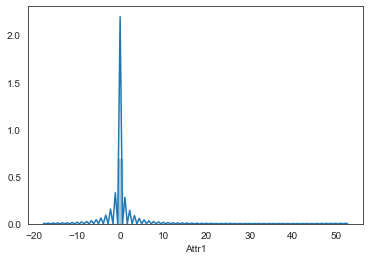

In [28]:
sns.distplot(datanew["Attr1"])

In [31]:
df_group1 = datanew[['Attr1','Attr7', 'Attr11', 'Attr14', 'class']]

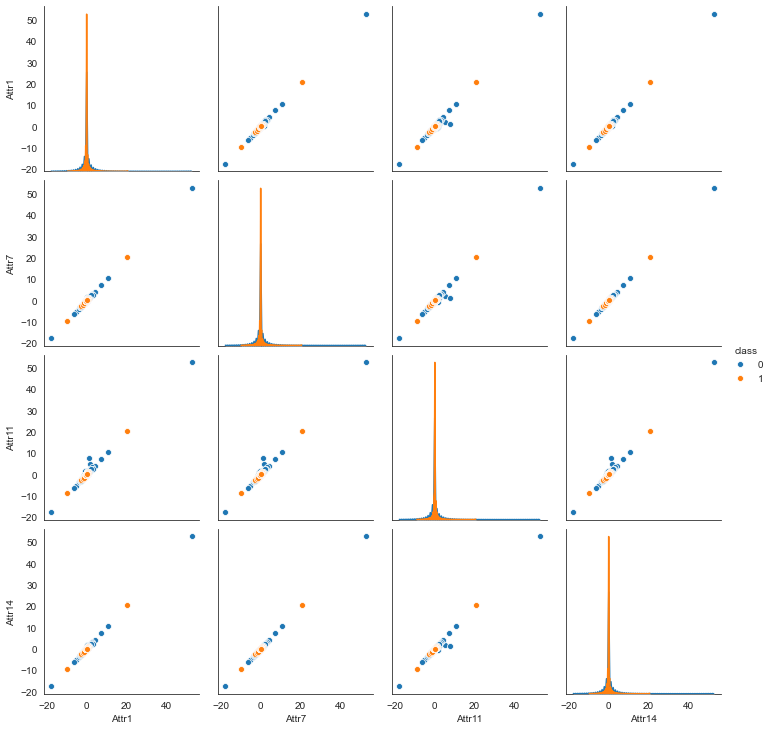

In [32]:
sns.pairplot(df_group1, hue='class', height=2.5)

In [81]:
def outlier_detector(attr, tol):
    quart1=attr.quantile(0.25)
    quart3=attr.quantile(0.75)
    IQR = quart3 - quart1
    lower = quart1 - tol*IQR
    upper = quart3 + tol*IQR
    
    total_outliers = ((attr<lower) | (attr>upper)).sum()
    column_height = len(attr.index)
    precent_outliers = (total_outliers*100/column_height).round(2)
    
    #print("Total rows in ",attr.name," is ", len(attr.index))
    #print("Total outliers in ",attr.name," is ", total_outliers)
    print("In ",attr.name,"\t Total outliers is \t", total_outliers,"\t", "out of", column_height, "rows. So", precent_outliers, "% outliers")
    

In [82]:
tolerance = 1.5
for column in datanew:
    outlier_detector(datanew[column], tolerance)

In  Attr1 	 Total outliers is 	 1266 	 out of 10503 rows. So 12.05 % outliers
In  Attr2 	 Total outliers is 	 290 	 out of 10503 rows. So 2.76 % outliers
In  Attr3 	 Total outliers is 	 271 	 out of 10503 rows. So 2.58 % outliers
In  Attr4 	 Total outliers is 	 1113 	 out of 10503 rows. So 10.6 % outliers
In  Attr5 	 Total outliers is 	 1562 	 out of 10503 rows. So 14.87 % outliers
In  Attr6 	 Total outliers is 	 3170 	 out of 10503 rows. So 30.18 % outliers
In  Attr7 	 Total outliers is 	 1139 	 out of 10503 rows. So 10.84 % outliers
In  Attr8 	 Total outliers is 	 1146 	 out of 10503 rows. So 10.91 % outliers
In  Attr9 	 Total outliers is 	 726 	 out of 10503 rows. So 6.91 % outliers
In  Attr10 	 Total outliers is 	 305 	 out of 10503 rows. So 2.9 % outliers
In  Attr11 	 Total outliers is 	 1012 	 out of 10503 rows. So 9.64 % outliers
In  Attr12 	 Total outliers is 	 1516 	 out of 10503 rows. So 14.43 % outliers
In  Attr13 	 Total outliers is 	 1100 	 out of 10503 rows. So 10.47 % ou

In [93]:
df_median_ol_treatment = datanew.copy(deep=True)

In [94]:
df_median_ol_treatment

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.143710,1.34800,-28.9820,0.603830,0.219460,1.122500,1.19610,0.463590,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.146240,0.46038,0.282300,1.62940,2.5952,0.000000,0.171850,1.172100,1.60180,0.539620,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0
2,0.000595,0.22612,0.488390,3.15990,84.8740,0.191140,0.004572,2.988100,1.00770,0.675660,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,0.024526,0.43236,0.275460,1.78330,-10.1050,0.569440,0.024526,1.305700,1.05090,0.564530,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0
4,0.188290,0.41504,0.342310,1.92790,-58.2740,0.000000,0.233580,1.409400,1.33930,0.584960,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,0.002861,0.58067,-0.223860,0.51658,-31.8660,0.002861,0.002861,0.618550,1.01200,0.359170,...,0.011834,0.007966,0.98817,0.327360,38.1420,39.1500,42.202,8.6489,5.2646,1
10499,-0.051968,0.55254,0.147150,2.16980,12.7480,-0.051968,-0.034361,0.669830,0.94694,0.370110,...,-0.056037,-0.140410,1.05600,1.153000,14.4930,9.2851,32.761,11.1410,1.9276,1
10500,-0.135900,0.83954,-0.342010,0.46526,-145.3100,-0.219120,-0.131860,0.191130,1.09990,0.160460,...,0.144120,-0.846930,0.85427,0.814200,6.2737,9.6966,212.230,1.7198,1.5659,1
10501,0.009422,0.50028,0.261630,1.52300,-10.1580,0.009422,0.007700,0.989900,1.01230,0.495230,...,0.012186,0.019027,0.98781,0.000000,5.9675,4.3536,98.240,3.7154,7.8068,1


In [95]:
def outlier_treater_median(attr, tol):
    quart1=attr.quantile(0.25)
    quart2=attr.quantile(0.50)
    quart3=attr.quantile(0.75)
    IQR = quart3 - quart1
    lower = quart1 - tol*IQR
    upper = quart3 + tol*IQR
    
    if(attr.name != "class"):
        df_median_ol_treatment[attr.name] = np.where((df_median_ol_treatment[attr.name] > upper) |(df_median_ol_treatment[attr.name] < lower) , quart2, df_median_ol_treatment[attr.name])

In [96]:
df_median_ol_treatment.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000,10503.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800,0.047129
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,...,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315,0.211926
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102,0.000000
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,...,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350,0.000000
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+00,0.000000,0.050945,1.111000,1.199000,0.515500,...,0.051765,0.106880,0.953060,0.002976,9.952100e+00,6.677300,7.066400e+01,5.139200,4.059300,0.000000
75%,0.123805,0.689330,0.419545,2.959500,5.608400e+01,0.072584,0.142275,2.857100,2.059100,0.725635,...,0.130010,0.271310,0.995927,0.240320,2.093600e+01,10.587500,1.182200e+02,8.882600,9.682750,0.000000
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000,1.000000


In [97]:
for column in df_median_ol_treatment:
    outlier_treater_median(df_median_ol_treatment[column], tolerance)

In [98]:
df_median_ol_treatment.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10503.000000,10503.000000,10503.000000,10485.000000,10478.000000,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,10460.000000,10503.000000,10474.000000,10503.000000,9911.000000,10486.000000,10460.000000,10485.000000,10275.000000,10503.000000
mean,0.055132,0.471526,0.226989,1.797780,2.052617,0.008607,0.064839,1.379031,1.416955,0.512450,...,0.060645,0.125739,0.943527,0.066428,11.426956,7.003060,76.024286,5.592025,4.759630,0.047129
std,0.087436,0.270816,0.287738,1.140869,70.153633,0.040741,0.100878,1.401404,0.712702,0.268852,...,0.085951,0.175138,0.082599,0.132909,8.651786,3.713534,47.596773,3.551275,4.099627,0.211926
min,-0.183050,0.000000,-0.583670,0.002080,-213.940000,-0.108380,-0.207790,-2.081800,-0.000084,-0.344980,...,-0.181850,-0.389200,0.695110,-0.351810,0.000000,-0.014534,0.000000,-0.000156,-0.000102,0.000000
25%,0.008169,0.253955,0.038011,1.040100,-32.013250,0.000000,0.010157,0.431270,1.011375,0.322885,...,0.014210,0.027493,0.904880,0.000000,5.533150,4.487600,40.781750,3.062800,2.023350,0.000000
50%,0.043034,0.464140,0.198560,1.605600,1.579300,0.000000,0.050945,1.111000,1.199000,0.515500,...,0.051765,0.106880,0.953060,0.002976,9.952100,6.677300,70.664000,5.139200,4.059300,0.000000
75%,0.101015,0.661980,0.419380,2.201900,35.193500,0.000000,0.119485,1.811300,1.761700,0.725115,...,0.100540,0.208300,0.988990,0.063005,13.995500,8.661925,100.210000,7.264600,5.748900,0.000000
max,0.308150,1.341900,1.000000,5.837100,217.850000,0.181390,0.352220,6.491900,3.628800,1.000000,...,0.317230,0.666500,1.176400,0.600120,44.015000,19.727000,234.360000,17.588000,21.148000,1.000000


In [99]:
df_median_ol_treatment.skew(axis = 0, skipna = True)

Attr1     0.292951
Attr2     0.395105
Attr3     0.083997
Attr4     1.372885
Attr5     0.060333
Attr6     1.932415
Attr7     0.284860
Attr8     1.495469
Attr9     1.034915
Attr10   -0.337776
Attr11    0.262639
Attr12    0.766119
Attr13    0.309812
Attr14    0.284659
Attr15    0.538153
Attr16    0.934837
Attr17    1.491486
Attr18    0.284722
Attr19    0.294779
Attr20    0.975859
Attr21    0.045587
Attr22    0.378081
Attr23    0.353005
Attr24    0.353357
Attr25   -0.330302
Attr26    0.895022
Attr27    1.315336
Attr28    1.197481
Attr29   -0.020777
Attr30    0.527366
Attr31    0.287743
Attr32    0.995194
Attr33    1.042976
Attr34    1.245447
Attr35    0.323601
Attr36    0.700900
Attr37    2.224227
Attr38   -0.586464
Attr39    0.332009
Attr40    1.903489
Attr41    0.673454
Attr42    0.363385
Attr43    0.600822
Attr44    0.639471
Attr45    0.677037
Attr46    1.386378
Attr47    1.018310
Attr48    0.215258
Attr49    0.090773
Attr50    1.359236
Attr51    0.687110
Attr52    0.993238
Attr53    0.

In [100]:
median_treated_corr = df_median_ol_treatment.corr()
median_treated_corr_pairs = median_treated_corr.unstack()
median_treated_high_corr = median_treated_corr_pairs[median_treated_corr_pairs>=0.8]
pd.set_option("max_rows", 200)
print(median_treated_high_corr)

Attr1   Attr1     1.000000
        Attr7     0.914111
        Attr11    0.850580
        Attr14    0.914053
        Attr18    0.914074
Attr2   Attr2     1.000000
Attr3   Attr3     1.000000
Attr4   Attr4     1.000000
Attr5   Attr5     1.000000
Attr6   Attr6     1.000000
Attr7   Attr1     0.914111
        Attr7     1.000000
        Attr11    0.898072
        Attr14    0.999949
        Attr18    0.999968
        Attr22    0.819075
Attr8   Attr8     1.000000
        Attr17    0.964775
Attr9   Attr9     1.000000
Attr10  Attr10    1.000000
Attr11  Attr1     0.850580
        Attr7     0.898072
        Attr11    1.000000
        Attr14    0.898008
        Attr18    0.898029
        Attr22    0.843273
Attr12  Attr12    1.000000
Attr13  Attr13    1.000000
Attr14  Attr1     0.914053
        Attr7     0.999949
        Attr11    0.898008
        Attr14    1.000000
        Attr18    0.999998
        Attr22    0.819027
Attr15  Attr15    1.000000
Attr16  Attr16    1.000000
        Attr26    0.920258
A

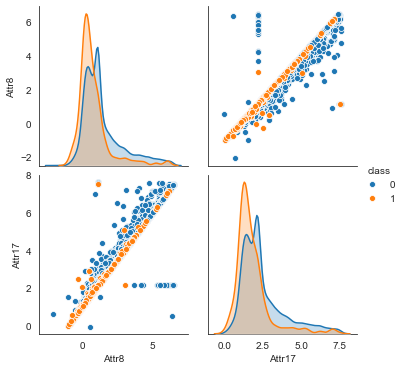

In [103]:
df_attr7 = df_median_ol_treatment[['Attr28', 'Attr17', 'Attr14','Attr18','Attr22', 'class']]
sns.pairplot(df_attr7, hue='class', height=2.5)